In [1]:
# Import all necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
# Locate and add the shape file with "*file*.shp" extension of the country you require.

india_map = gdp.read_file("/home/usr/Downloads/India_Shape/india_st.shp")

<AxesSubplot:>

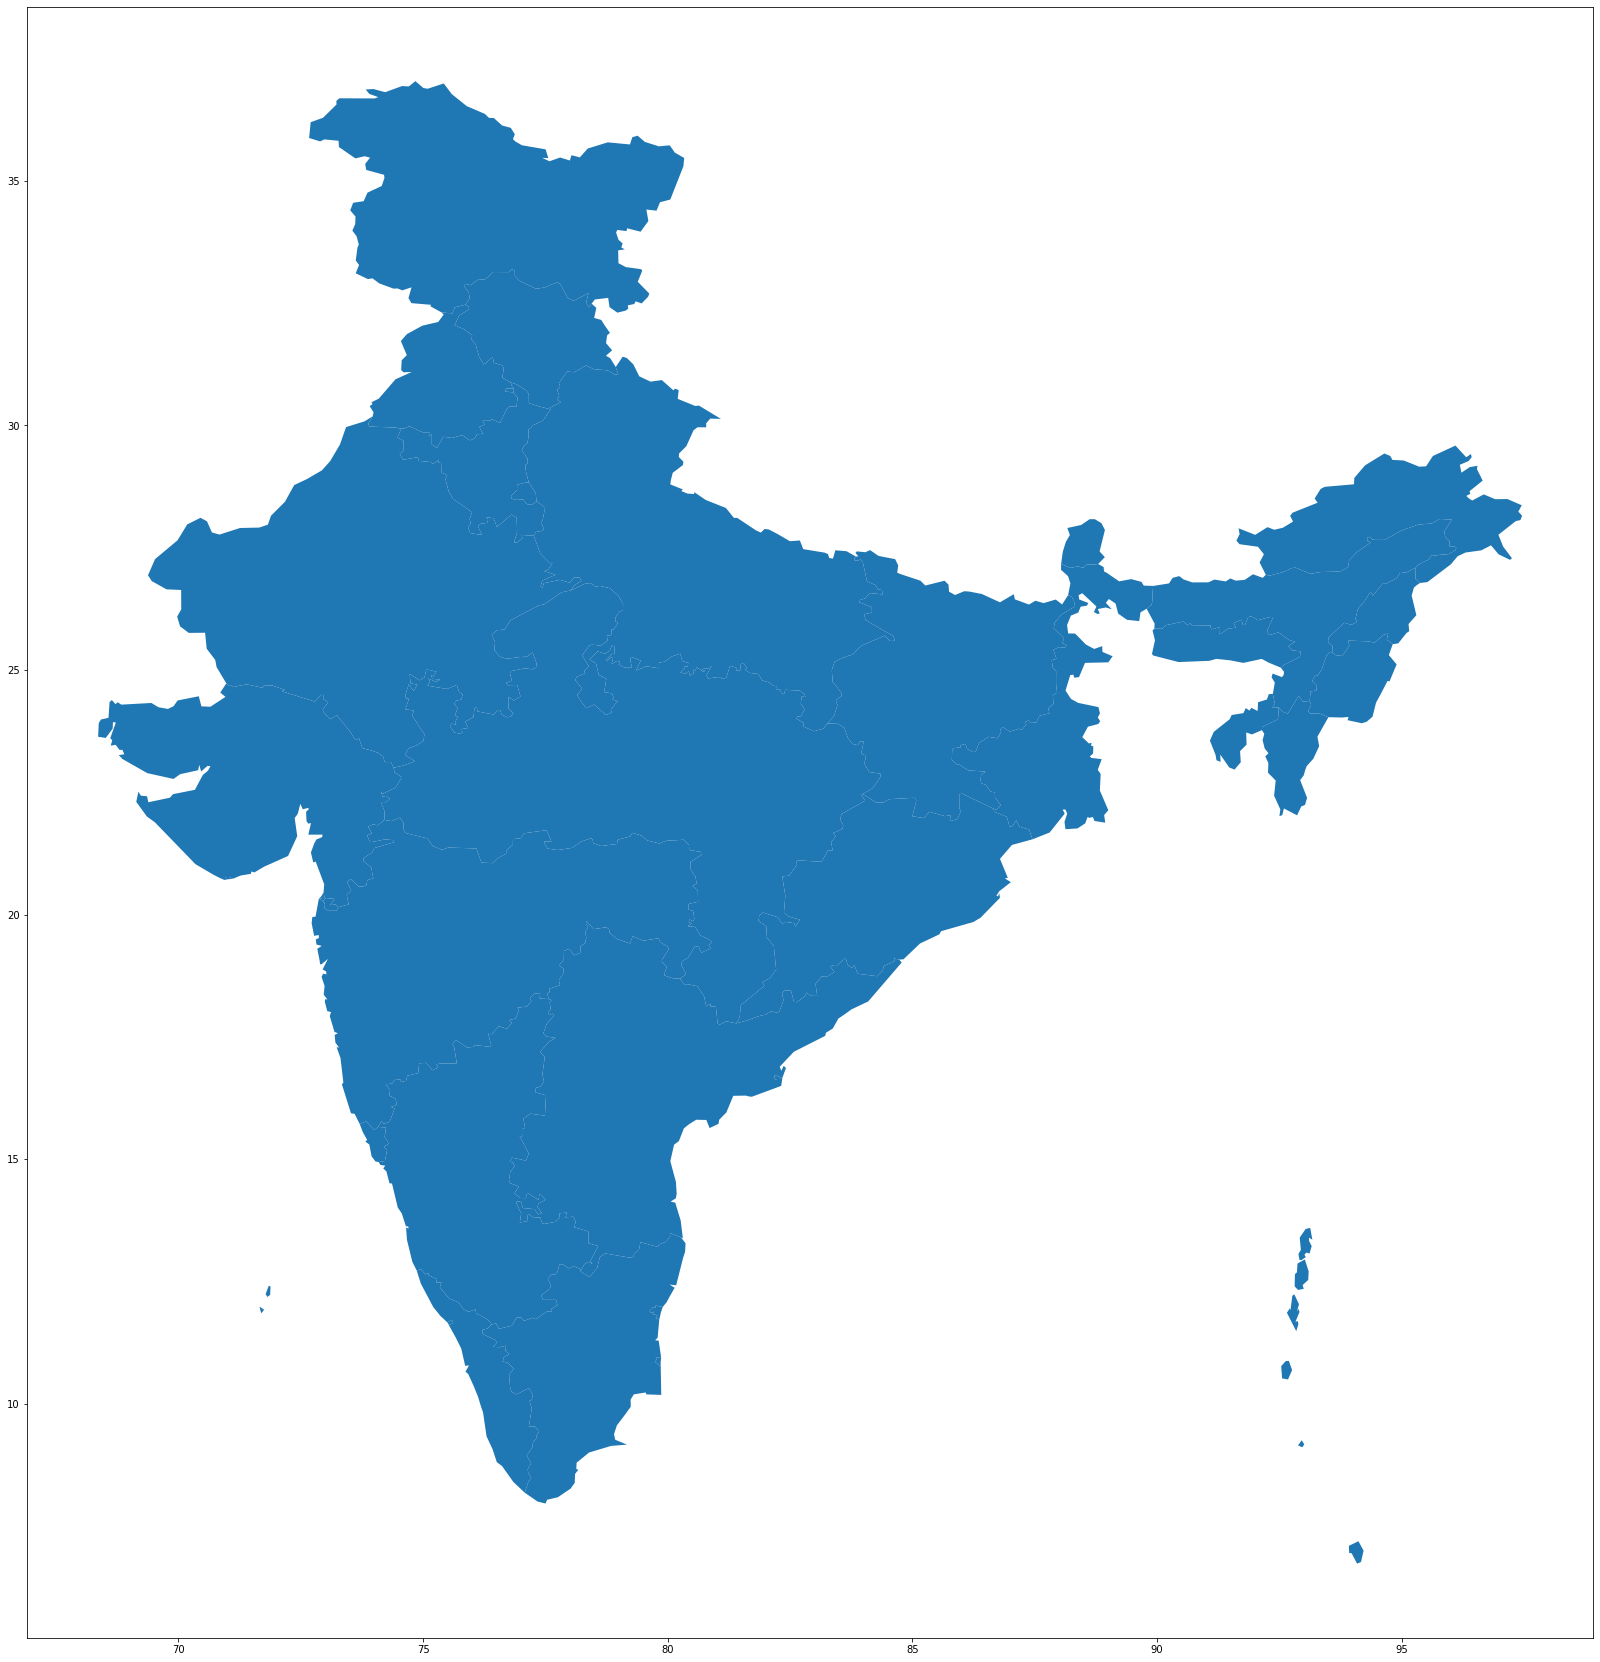

In [3]:
#Viewing the shape file 

fig,ax = plt.subplots(figsize = (30,30))
india_map.plot(ax = ax)

In [4]:
#Reading the csv file with longitude and latitude data and heading the data to make sure its correcly loaded.

df = pd.read_csv("/home/usr/Downloads/state.csv") 
#use state.csv
crs = {'init': 'epsg:4326'}
df.head()

,State,Latitude,Longitude,Ids
0,Assam,26.66,92.78,1
1,Assam,26.44,89.98,1
2,Manipur,24.75,93.42,1
3,Manipur,24.27,94.00,1
4,Manipur,24.46,93.95,1


In [5]:
#Tailing data to make sure the whole data ia loaded.

df.tail()

,State,Latitude,Longitude,Ids
303,Maharashtra,18.80,73.32,2
304,Maharashtra,17.75,73.27,2
305,Maharashtra,17.67,73.21,2
306,Maharashtra,17.76,73.21,2
307,Maharashtra,17.71,73.47,2


In [6]:
geometry = [Point(xy) for xy in zip( df["Longitude"], df["Latitude"])]

In [7]:
geometry[:3]

In [8]:
# Confirming the data frame type of coloumns and making sure that latitude and longitude is of type: float64.

df.dtypes

State         object
Latitude     float64
Longitude    float64
Ids            int64
dtype: object

In [9]:
gdf = gdp.GeoDataFrame(df, geometry=gdp.points_from_xy(df.Longitude, df.Latitude))

In [10]:
print(gdf.head())

     State  Latitude  Longitude  Ids                   geometry
0    Assam     26.66      92.78    1  POINT (92.78000 26.66000)
1    Assam     26.44      89.98    1  POINT (89.98000 26.44000)
2  Manipur     24.75      93.42    1  POINT (93.42000 24.75000)
3  Manipur     24.27      94.00    1  POINT (94.00000 24.27000)
4  Manipur     24.46      93.95    1  POINT (93.95000 24.46000)


In [11]:
# Configuring and plotting the Latitudes and Longitudes Data and heading it.

geo_df = gdp.GeoDataFrame(df, crs = "EPSG:2163", geometry = geometry)
geo_df.head()

,State,Latitude,Longitude,Ids,geometry
0,Assam,26.66,92.78,1,POINT (92.780 26.660)
1,Assam,26.44,89.98,1,POINT (89.980 26.440)
2,Manipur,24.75,93.42,1,POINT (93.420 24.750)
3,Manipur,24.27,94.00,1,POINT (94.000 24.270)
4,Manipur,24.46,93.95,1,POINT (93.950 24.460)


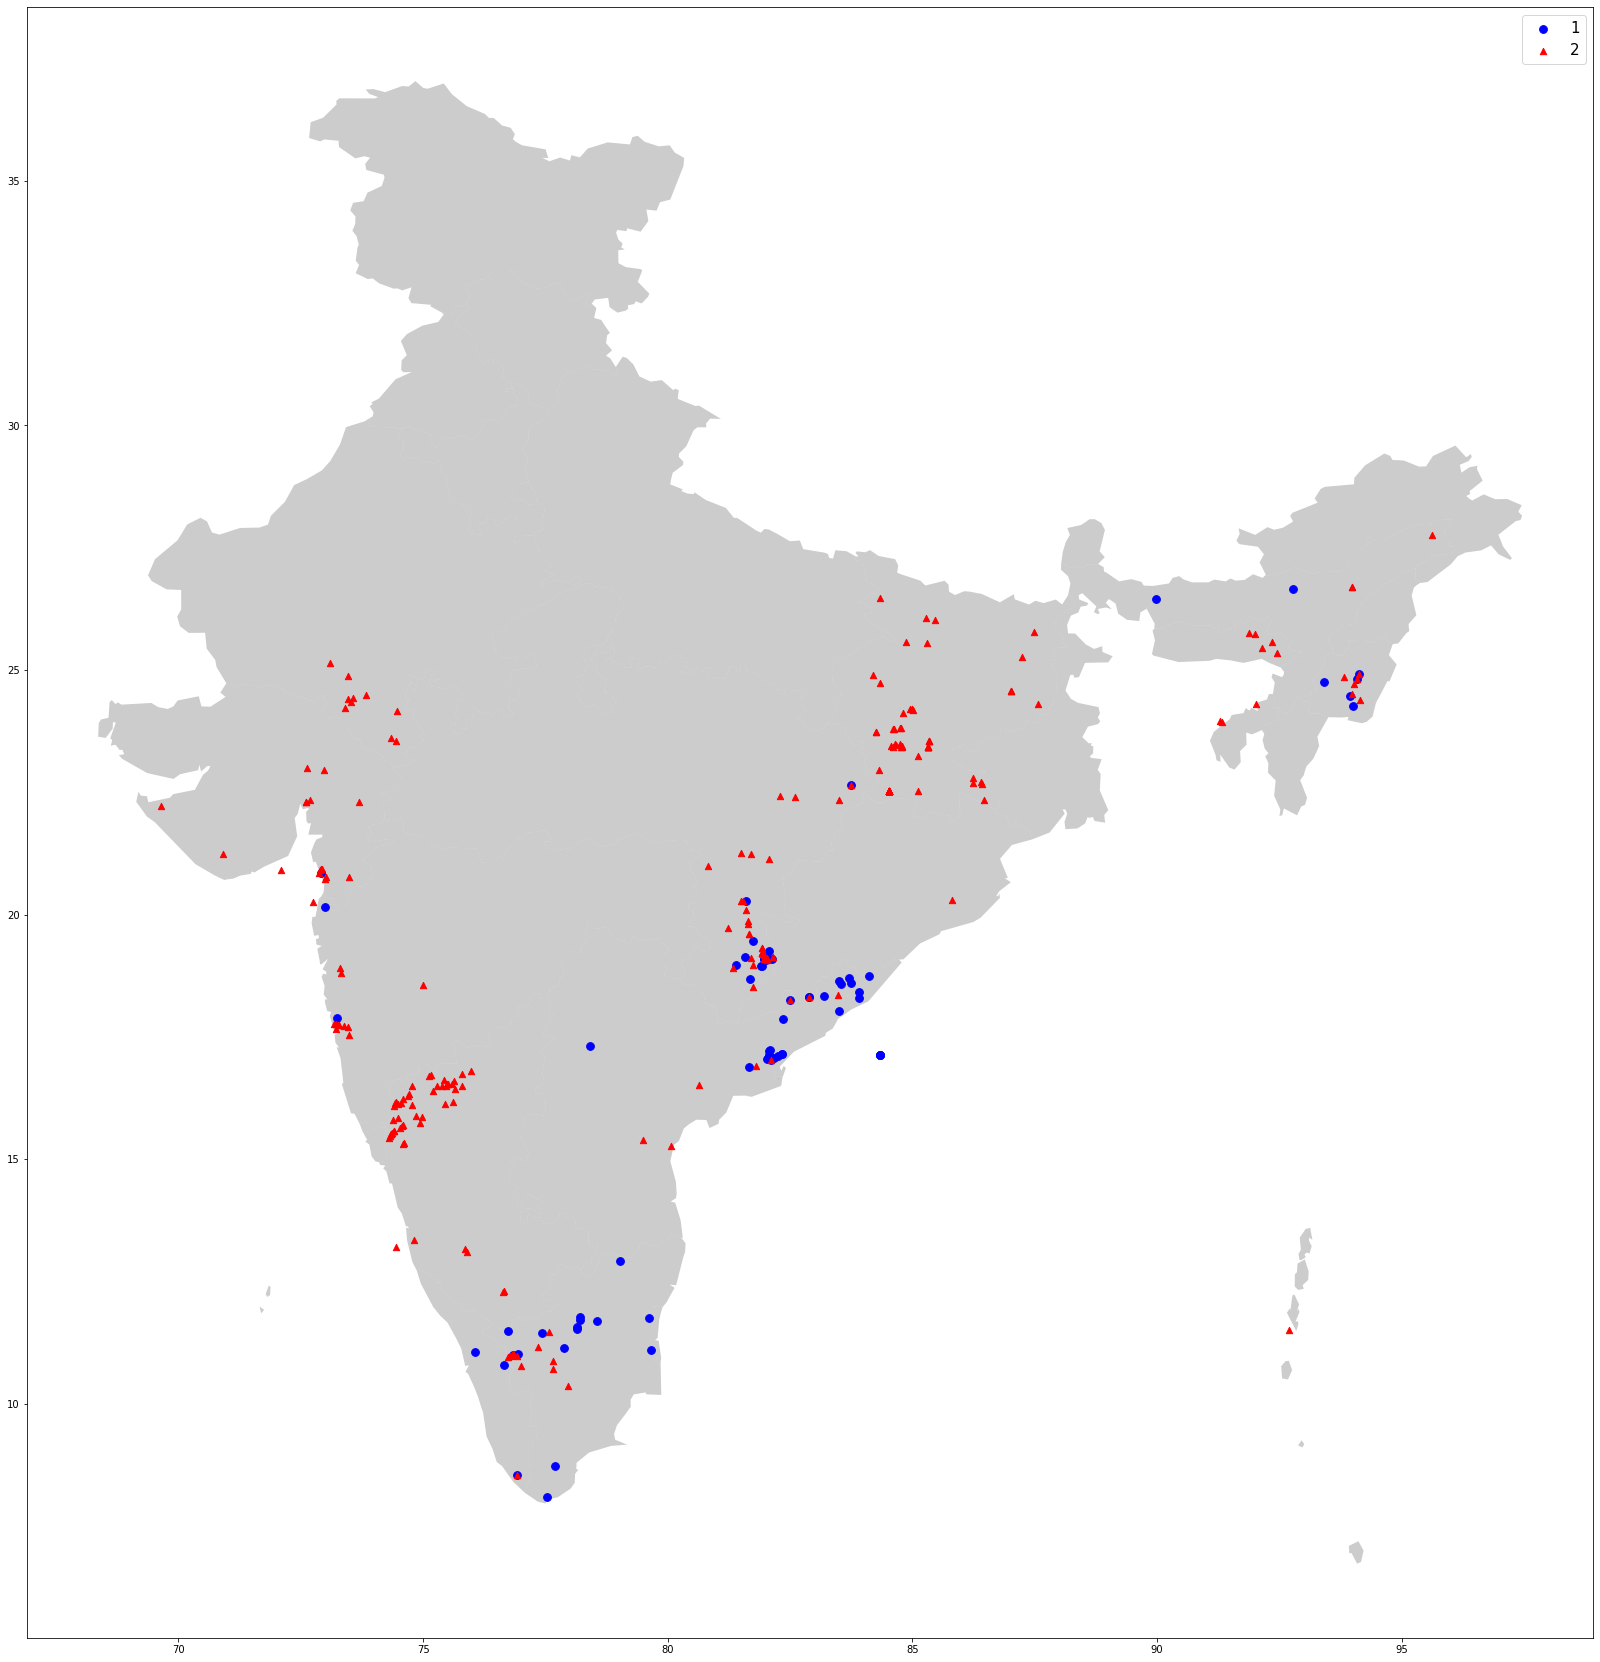

In [12]:
#Plotting the latitue and Longitude to two seperate data on to ashape file and using different marker size and pointers for both the data and outputting it into a png file.

fig,ax = plt.subplots(figsize = (30,30))
india_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['Ids'] == 1].plot(ax = ax, markersize = 60, color = "blue", marker = "o", label = "1")
geo_df[geo_df['Ids'] == 2].plot(ax = ax, markersize = 40, color = "red", marker = "^", label = "2")
plt.legend(prop={'size': 15})
plt.savefig('all.png', dpi=300, bbox_inches='tight')